---
title: "Lab 8: Finding Motifs in Transcription Factor Networks"
author: RK Azhigulova
date: '2nd April 2025'
---

Initial Value Problems for Systems Modeling


This notebook summarizes 10 fundamental initial value problems (IVPs) used in mathematical modeling across biology, chemistry, and physics. Each IVP includes a differential equation and an initial condition.


1. Exponential Growth

This describes a process where the rate of change of a population (or quantity) is proportional to its current size.

IVP:

$\displaystyle \frac{dP}{dt} = rP,\quad P(0) = P_0$

Solution:

$\displaystyle P(t) = P_0 e^{rt}$

2. Logistic Growth

This introduces a carrying capacity 𝐾 which limits growth as the population increases.

IVP:

$\displaystyle \frac{dP}{dt} = rP\left(1 - \frac{P}{K}\right),\quad P(0) = P_0$

Solution:

$\displaystyle P(t) = \frac{K}{1 + \left(\frac{K - P_0}{P_0}\right)e^{-rt}}$



3. Pharmacokinetics (Drug Clearance)

Describes how a drug enters and is removed from the bloodstream.

IVP:

$\displaystyle \frac{dC}{dt} = k_{\text{in}} - k_{\text{out}} C,\quad C(0) = C_0$

Solution:

$\displaystyle C(t) = \frac{k_{\text{in}}}{k_{\text{out}}} + \left(C_0 - \frac{k_{\text{in}}}{k_{\text{out}}}\right)e^{-k_{\text{out}} t}$

4. SIR Epidemiological Model

Tracks susceptible (S), infected (I), and recovered (R) individuals.

System:

$\begin{aligned} \frac{dS}{dt} &= -\beta SI \ \frac{dI}{dt} &= \beta SI - \gamma I \ \frac{dR}{dt} &= \gamma I \end{aligned}$

Initial Conditions:
$S(0) = S_0,\quad I(0) = I_0,\quad R(0) = R_0$



5. Predator-Prey Model (Lotka-Volterra)

Describes how predator and prey populations affect each other.

System:

$\begin{aligned} \frac{dx}{dt} &= ax - bxy \ \frac{dy}{dt} &= cxy - dy \end{aligned}$

Initial Conditions:
$x(0) = x_0,\quad y(0) = y_0$

6. Enzyme Kinetics (Michaelis-Menten)

Describes how a substrate is consumed in an enzymatic reaction.

IVP:

$\displaystyle \frac{dS}{dt} = -\frac{V_{\text{max}} S}{K_m + S},\quad S(0) = S_0$



7. Genetic Circuit with Negative Feedback

A gene produces a protein that inhibits its own production.

IVP:

$\displaystyle \frac{dP}{dt} = \frac{\alpha}{1 + P^n} - \beta P,\quad P(0) = P_0$

8. Fick’s Law (Diffusion)

Describes how a substance diffuses out of a cell or membrane.

IVP:

$\displaystyle \frac{dC}{dt} = -kC,\quad C(0) = C_0$

Solution:

$\displaystyle C(t) = C_0 e^{-kt}$



9. Tumor Growth Model (Gompertz)

Describes a tumor that grows fast early and slows as it reaches a max size.

IVP:

$\displaystyle \frac{dT}{dt} = rT \ln\left(\frac{K}{T}\right),\quad T(0) = T_0$

Solution:

$\displaystyle T(t) = K \exp\left[\ln\left(\frac{T_0}{K}\right)e^{-rt}\right]$



10. Calcium Dynamics in Neurons

Describes how calcium concentration changes due to influx and removal.

IVP (Same as Pharmacokinetics):

$\displaystyle \frac{dC}{dt} = k_{\text{in}} - k_{\text{out}} C,\quad C(0) = C_0$



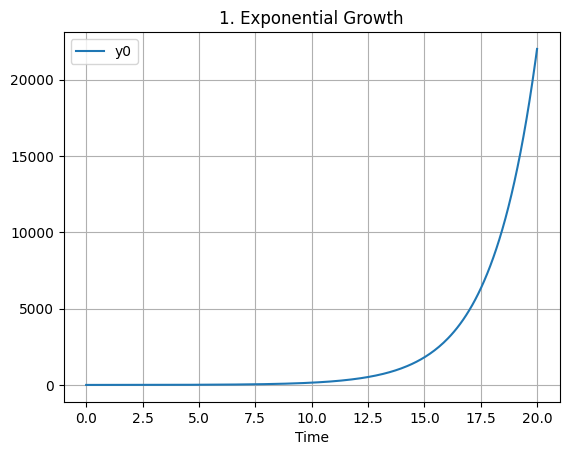

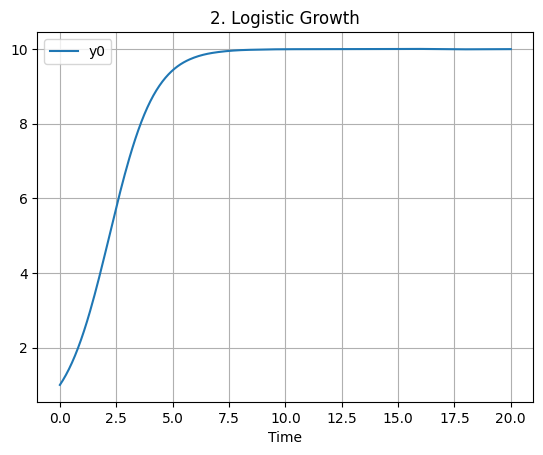

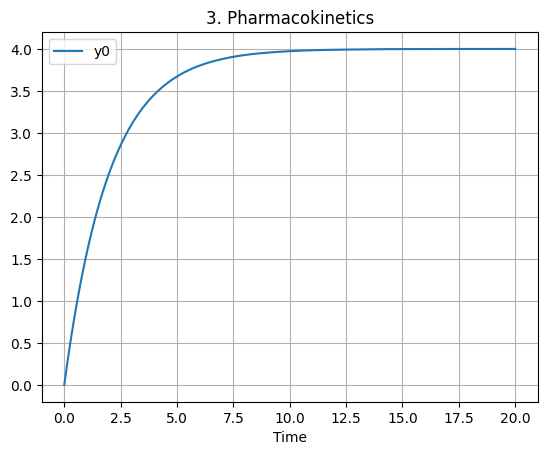

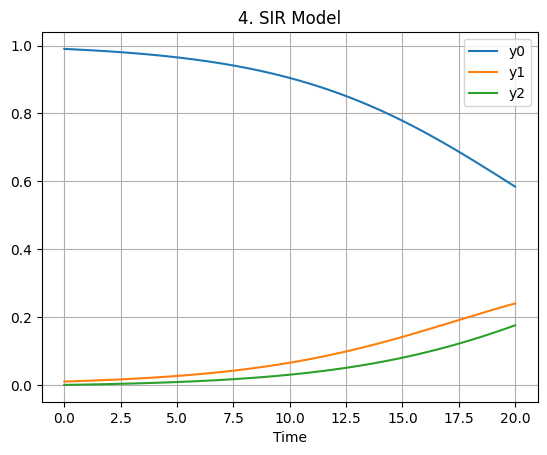

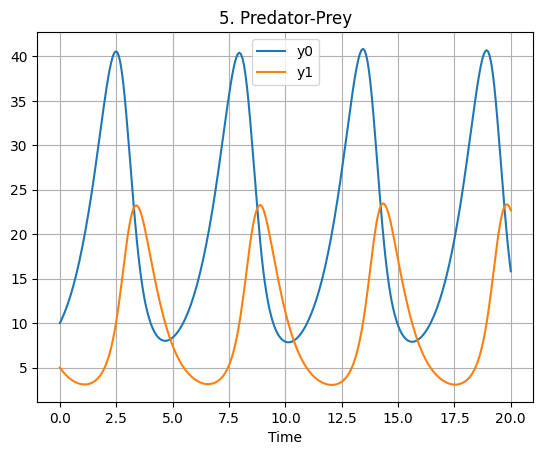

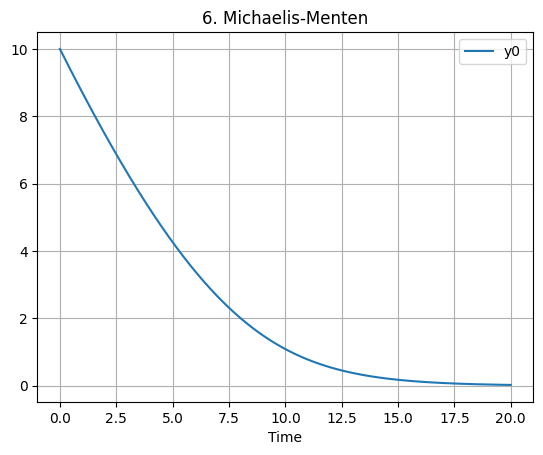

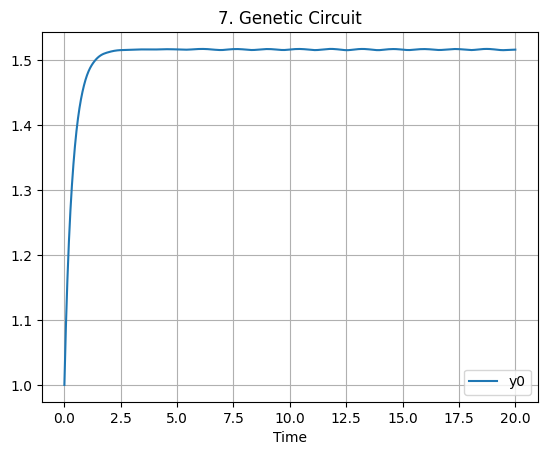

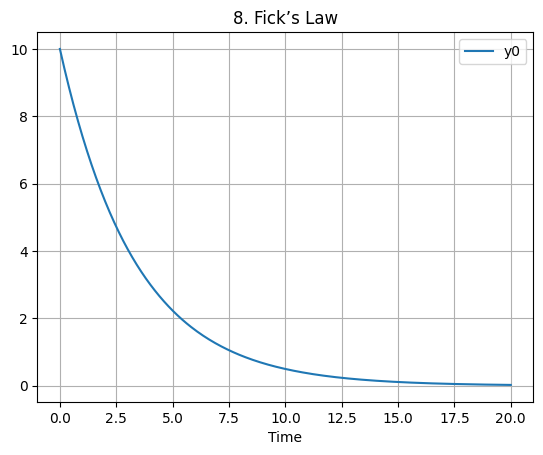

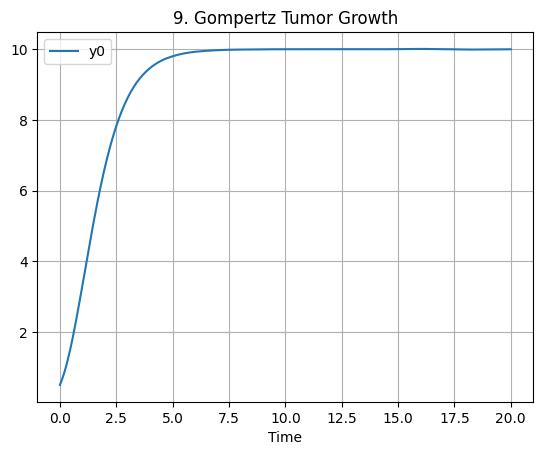

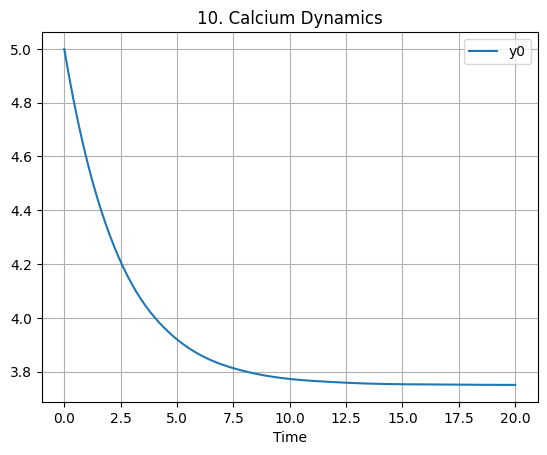

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Time range
t_span = (0, 20)
t_eval = np.linspace(*t_span, 300)

# 1. Exponential Growth
def exponential_growth(t, P, r):
    return r * P

# 2. Logistic Growth
def logistic_growth(t, P, r, K):
    return r * P * (1 - P / K)

# 3 & 10. Pharmacokinetics / Calcium Dynamics
def clearance_model(t, C, k_in, k_out):
    return k_in - k_out * C

# 4. SIR Model
def sir_model(t, y, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I
    return [dSdt, dIdt, dRdt]

# 5. Predator-Prey
def predator_prey(t, y, a, b, c, d):
    x, y_pred = y
    dxdt = a * x - b * x * y_pred
    dydt = c * x * y_pred - d * y_pred
    return [dxdt, dydt]

# 6. Michaelis-Menten
def michaelis_menten(t, S, Vmax, Km):
    return -Vmax * S / (Km + S)

# 7. Genetic Circuit
def genetic_circuit(t, P, alpha, beta, n):
    return alpha / (1 + P**n) - beta * P

# 9. Gompertz Tumor Growth
def gompertz_growth(t, T, r, K):
    return r * T * np.log(K / T)

# Solver and plotter function
def solve_and_plot(model, y0, params, title):
    sol = solve_ivp(lambda t, y: model(t, y, *params), t_span, y0, t_eval=t_eval)
    plt.plot(sol.t, sol.y.T)
    plt.title(title)
    plt.xlabel("Time")
    plt.legend([f"y{i}" for i in range(len(y0))])
    plt.grid(True)
    plt.show()

# Run and plot each model
solve_and_plot(exponential_growth, [1], [0.5], "1. Exponential Growth")
solve_and_plot(logistic_growth, [1], [1.0, 10], "2. Logistic Growth")
solve_and_plot(clearance_model, [0], [2.0, 0.5], "3. Pharmacokinetics")
solve_and_plot(lambda t, y: sir_model(t, y, 0.3, 0.1), [0.99, 0.01, 0], [], "4. SIR Model")
solve_and_plot(lambda t, y: predator_prey(t, y, 1.0, 0.1, 0.075, 1.5), [10, 5], [], "5. Predator-Prey")
solve_and_plot(michaelis_menten, [10], [2.0, 5.0], "6. Michaelis-Menten")
solve_and_plot(genetic_circuit, [1], [5.0, 1.0, 2], "7. Genetic Circuit")
solve_and_plot(clearance_model, [10], [0.0, 0.3], "8. Fick’s Law")
solve_and_plot(gompertz_growth, [0.5], [1.0, 10.0], "9. Gompertz Tumor Growth")
solve_and_plot(clearance_model, [5], [1.5, 0.4], "10. Calcium Dynamics")
